# 📤 Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# 💾 Reading Data

In [2]:
train = pd.read_csv(r'C:\Users\vicky\Downloads\Titanicdataset\train.csv')
test = pd.read_csv(r'C:\Users\vicky\Downloads\Titanicdataset\test.csv')
test2=pd.read_csv(r'C:\Users\vicky\Downloads\Titanicdataset\test.csv')
titanic=pd.concat([train, test], sort=False)
len_train=train.shape[0]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 💾 Checking Out the Data

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Some Key Points Observed:

Most of the passengers are below 39

Most people did not have any siblings/spouses or parents/children along with them on board(generalization).

Let's explore the data more accurately

# Handling Missing Values

In [5]:
train.isnull().sum()[train.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()[test.isnull().sum()>0]

Age       86
Fare       1
Cabin    327
dtype: int64

Since Fare has only 1 missing Value, We'll fill it with the mean

Embarked can be filled by Mode.(only 2 missing Values)

We'll have to be a bit More Creative with Age...

In [7]:
train.Fare=train.Fare.fillna(train.Fare.mean())
test.Fare=test.Fare.fillna(train.Fare.mean())
train.Embarked=train.Embarked.fillna(train.Embarked.mode()[0])
test.Embarked=test.Embarked.fillna(train.Embarked.mode()[0])

# Age

Considering title Inspired on: https://medium.com/i-like-big-data-and-i-cannot-lie/how-i-scored-in-the-top-9-of-kaggles-titanic-machine-learning-challenge-243b5f45c8e9

In [8]:
train['title']=train.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
test['title']=test.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Ms                1
Don               1
Lady              1
the Countess      1
Capt              1
Sir               1
Jonkheer          1
Mme               1
Name: title, dtype: int64

In [9]:
newtitles={
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"}

Turning 18 rows into 6 rows. We can even Look at the Survival Rates of each Row to See if These Rows are Significant.

In [10]:
train['title']=train.title.map(newtitles)
test['title']=test.title.map(newtitles)

In [11]:
train.groupby(['title','Sex']).Age.mean()

title    Sex   
Master   male       4.574167
Miss     female    21.804054
Mr       male      32.368090
Mrs      female    35.718182
Officer  female    49.000000
         male      46.562500
Royalty  female    40.500000
         male      42.333333
Name: Age, dtype: float64

In [12]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 4.57
        elif title=='Miss' and Sex=='female':
            return 21.8
        elif title=='Mr' and Sex=='male': 
            return 32.37
        elif title=='Mrs' and Sex=='female':
            return 35.72
        elif title=='Officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.56
        elif title=='Royalty' and Sex=='female':
            return 40.50
        else:
            return 42.33
    else:
        return Age 
    
train.Age=train[['title','Sex','Age']].apply(newage, axis=1)
test.Age=test[['title','Sex','Age']].apply(newage, axis=1)

# 📊 Exploratory Data Analysis (EDA)

In [13]:
sns.set()

# Survived

Let's See how many Survived and how many did not

In [14]:
data = train.groupby("Survived")["Survived"].count()
data

Survived
0    549
1    342
Name: Survived, dtype: int64

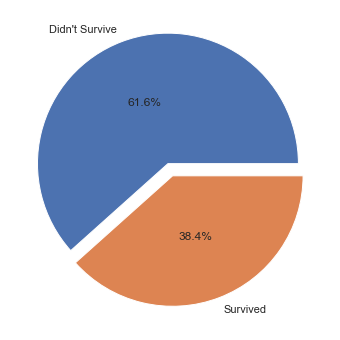

In [15]:
pie, ax = plt.subplots(figsize=[10,6])
labels = ["Didn't Survive","Survived"]
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.show()

Most People Did not Survive(Only 38.4% of the Training Data Survived out of 891 people). 

# Passenger Class

To see if Passenger Class affected the Survival Chance, we'll look at the Survival Rate of each Passenger Class

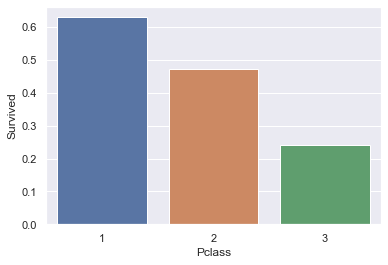

In [16]:
PassengerClassSurvival=train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ax=sns.barplot(x='Pclass',y='Survived',data=PassengerClassSurvival)

In [17]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Passesger Class definately Affected the Survival Chance, The Bar Graph shows significant Difference in Mean of Survived, and We also have Enough Data for each class and cannot claim the Difference is because of Luck.

# Name

Names are made up of 4 parts - > Family Name + Mr/Miss/Miss/Dr/Master,etc + Persons Name + Father's Name + optional(Sibling or Partners aboard or Parents or Children aboard Name)

Rich Family Name may mean more chance of survival but Poor people and Rich People can have the same Family Names. Still, it's Highly Unlikely that we find Many people with Common Family Names, Real names and Father's Names AND Have Enough Data for each name to not blame on the Survival on Luck.

Title Part(Mr,Miss,etc) is Something we can Work on. Since, we have already used it to fill in the Ages, we may as well try to see if there are Differences in Survival In those Rows.

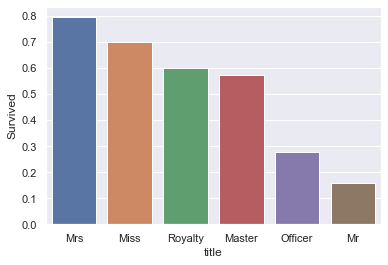

In [18]:
titleSurvival=train[['title', 'Survived']].groupby(['title'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ax=sns.barplot(x='title',y='Survived',data=titleSurvival)

In [19]:
train['title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64

There is Definitely Information to be captured from here. The Survived mean Shows Significant Difference in each Title and We have Enough Counts for each Title(Except for Royalty, which could be a coincidence).

Some Key Observations,

1) Married Women had Better Chance of Survival Than Unmarried Women.

2) Children had Better Chance of Survival Than Young Men and Older Men(Tragic).

3) Most Officers on Board Died.

# Family Name Part

We know that it is Highly Unlikely to find Decent Information about the Dataset which is equally distributed and shows significant Difference in survival from Family Name, but we would be a bad Data Analyst to not try to find it.

In [20]:
train['Name2']=train.Name.apply(lambda x: x.split(',')[0].strip())
test['Name2']=test.Name.apply(lambda x: x.split(',')[0].strip())
train['Name2']

0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name2, Length: 891, dtype: object

In [21]:
train['Name2'].value_counts()

Andersson     9
Sage          7
Goodwin       6
Carter        6
Johnson       6
             ..
Crease        1
Hendekovic    1
Lewy          1
Gale          1
Lindell       1
Name: Name2, Length: 667, dtype: int64

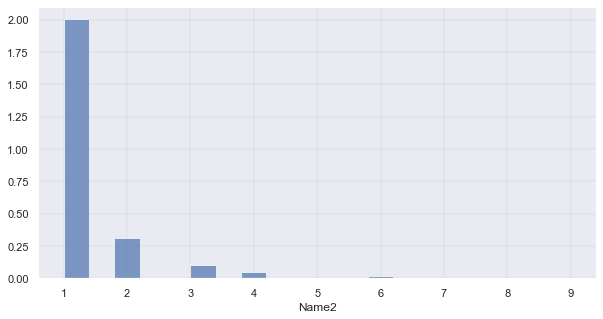

In [22]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(train['Name2'].value_counts(),bins=20,density=True,alpha=0.7)
ax.set_xlabel('Name2')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

In [23]:
FamilyNameUnique=np.where(train['Name2'].value_counts()==1)
len(FamilyNameUnique[0])/len(train['Name2'].value_counts())

0.800599700149925

80% of the Family Names are unique, i.e. approximately 534 values out of 891, which is 59.932% of the total Data.

Still let's Try and add this to our Dataset

# Sex

We already know from the Mr and Mrs or Miss Part that Women have Significantly More Chance Of Survival Than Men

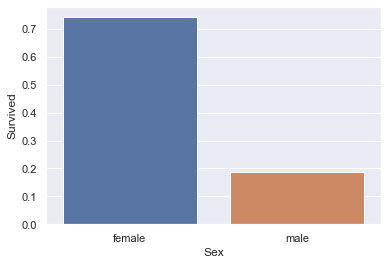

In [24]:
SexSurvival=train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
ax=sns.barplot(x='Sex',y='Survived',data=SexSurvival)

Nothing we Already Did Not Know

# Age

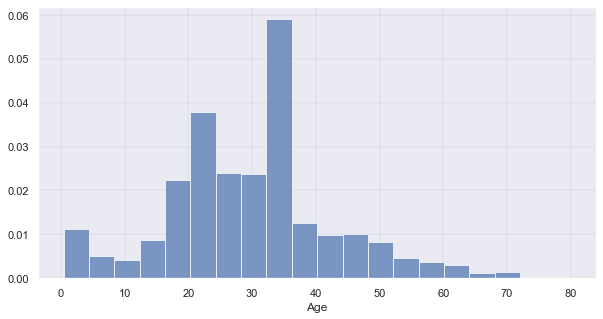

In [25]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(train['Age'],bins=20,density=True,alpha=0.7)
ax.set_xlabel('Age')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

Almost Normal if you remove the People in their Early 30s

# Histogram of People who Survived

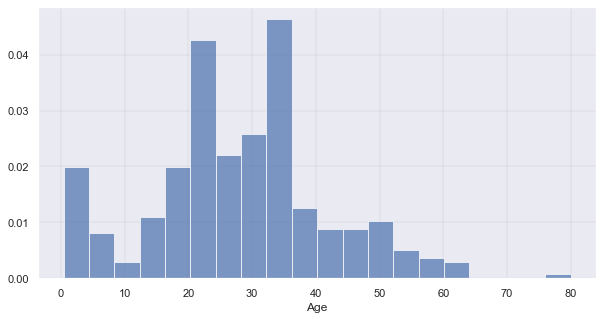

In [26]:
d=train[train.Survived==1]
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(d['Age'],bins=20,density=True,alpha=0.7)
ax.set_xlabel('Age')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

# Histogram of People who did Not Survive

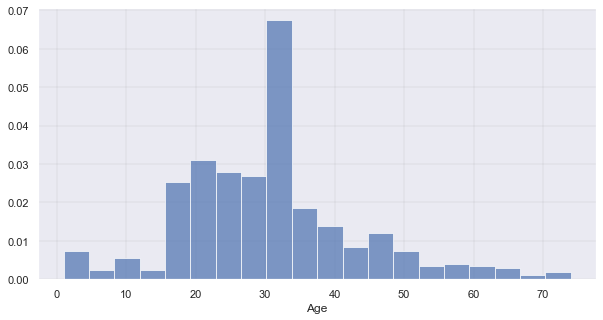

In [27]:
d=train[train.Survived==0]
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(d['Age'],bins=20,density=True,alpha=0.7)
ax.set_xlabel('Age')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

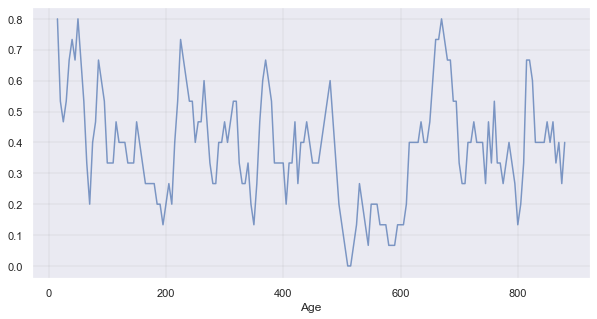

In [28]:
Age=train[['Age','Survived']].sort_values(by='Age').reset_index(drop=True)
Numbers=[]
List=[]
for i in range(15,885,5):
    List.append(Age['Survived'][i-15:i].mean())
    Numbers.append(i)
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(Numbers,List,alpha=0.7)
ax.set_xlabel('Age')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

Key Observations,

1) More Infants and Children Survived Than Young People and Older People

2) More Older People(30-40) Died than Younger People(20-30).

# SibSp and Parch

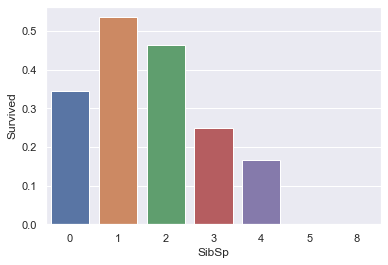

In [29]:
NoOfSiblingSurvival=train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
ax=sns.barplot(x='SibSp',y='Survived',data=NoOfSiblingSurvival)

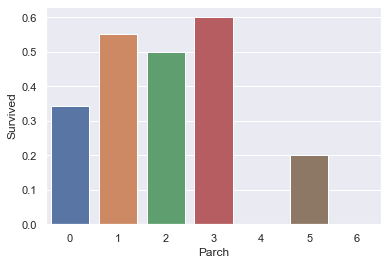

In [30]:
ParentsChildSurvival=train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
ax=sns.barplot(x='Parch',y='Survived',data=ParentsChildSurvival)

There is no Clear Linear Trend in Both the Columns. Maybe if we Combine Them Both, We'll Have a Better Trend.  

# Relatives

In [31]:
train['Relatives']=train.SibSp+train.Parch
test['Relatives']=test.SibSp+test.Parch

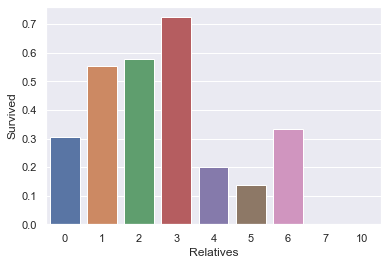

In [32]:
Relatives=train[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean()
ax=sns.barplot(x='Relatives',y='Survived',data=Relatives)

In [33]:
data = train.groupby("Relatives")["Relatives"].count()
data

Relatives
0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Relatives, dtype: int64

Well, There is no Linear Trend in This too, but it's better than 2 columns.

# Ticket

Tickets are Alpha Numeric and cannot be categorized easily, maybe They can be seperated as the Text Part and Number Part or By the Length of the Ticket. Let's first Look at the Length of Tickets.

In [34]:
train['Ticket2']=train.Ticket.apply(lambda x : len(x))
test['Ticket2']=test.Ticket.apply(lambda x : len(x))

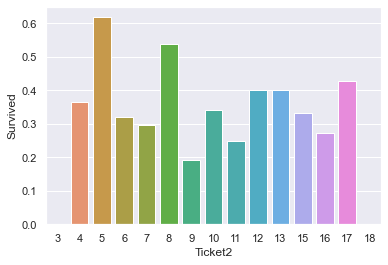

In [35]:
TicketLength=train[['Ticket2', 'Survived']].groupby(['Ticket2'], as_index=False).mean()
ax=sns.barplot(x='Ticket2',y='Survived',data=TicketLength)


In [36]:
data = train.groupby("Ticket2")["Ticket2"].count()
data

Ticket2
3       2
4     101
5     131
6     419
7      27
8      76
9      26
10     41
11      8
12     10
13     10
15      9
16     11
17     14
18      6
Name: Ticket2, dtype: int64

I have no idea how this worked but this is a Decent Column. Although it has no Specific Trend, it is Definitely Something.

# Fare

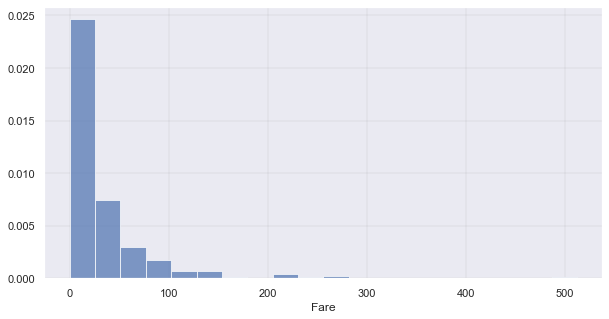

In [37]:
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(train['Fare'],bins=20,density=True,alpha=0.7)
ax.set_xlabel('Fare')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

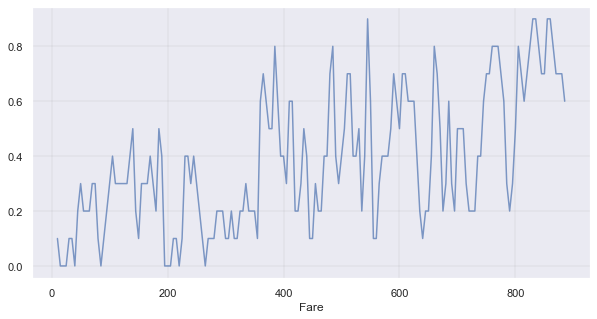

In [38]:
Fare=train[['Survived','Fare']].sort_values(by='Fare').reset_index(drop=True)
Numbers=[]
List=[]
for i in range(10,890,5):
    List.append(Fare['Survived'][i-10:i].mean())
    Numbers.append(i)
fig,ax=plt.subplots(1,figsize=(10,5))
ax.plot(Numbers,List,alpha=0.7)
ax.set_xlabel('Fare')
ax.grid(color='grey',linestyle='-',linewidth=0.25,alpha=0.5)
plt.show()

Definately Trend to be Captured

# Cabin

Since it has So Many Null Values(681 out of 891 and 327 out of 891), I think it would be wise to Not Include this Column in our Model

# Embarked

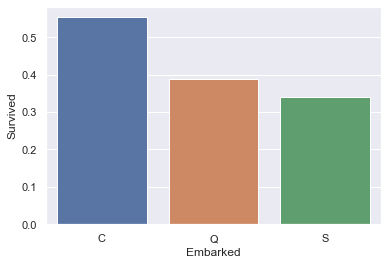

In [39]:
ax=sns.barplot(x='Embarked',y='Survived',data=train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

In [40]:
train.groupby("Embarked")["Embarked"].count()

Embarked
C    168
Q     77
S    646
Name: Embarked, dtype: int64

# Preparing The Data

In [41]:
#droping features I won't use in model
#train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin']
train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [42]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Name2,Relatives,Ticket2
0,0,3,male,22.0,7.2500,S,Mr,Braund,1,9
1,1,1,female,38.0,71.2833,C,Mrs,Cumings,1,8
2,1,3,female,26.0,7.9250,S,Miss,Heikkinen,0,16
3,1,1,female,35.0,53.1000,S,Mrs,Futrelle,1,6
4,0,3,male,35.0,8.0500,S,Mr,Allen,0,6
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Officer,Montvila,0,6
887,1,1,female,19.0,30.0000,S,Miss,Graham,0,6
888,0,3,female,21.8,23.4500,S,Miss,Johnston,3,10
889,1,1,male,26.0,30.0000,C,Mr,Behr,0,6


In [43]:
titanic=pd.concat([train, test], sort=False)
titanic=pd.get_dummies(titanic)
train=titanic[:len_train]
test=titanic[len_train:]

In [44]:
train

,Survived,Pclass,Age,Fare,Relatives,Ticket2,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Name2_Zabour,Name2_Zakarian,Name2_Zimmerman,Name2_de Brito,Name2_de Messemaeker,Name2_de Mulder,Name2_de Pelsmaeker,Name2_del Carlo,Name2_van Billiard,Name2_van Melkebeke
0,0.0,3,22.0,7.2500,1,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,38.0,71.2833,1,8,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,0,16,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,1,35.0,53.1000,1,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,13.0000,0,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1.0,1,19.0,30.0000,0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0.0,3,21.8,23.4500,3,10,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1.0,1,26.0,30.0000,0,6,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Nothing stands out. Although Relatives and Ticket2 does not seem very important to predict Survived.

In [45]:
xtrain=train.drop(["Survived",'Sex_female','Embarked_C','title_Royalty'],axis=1)
ytrain=train['Survived']
xtest=test.drop(["Survived",'Sex_female','Embarked_C','title_Royalty'], axis=1)

# 📈 Training Models¶

# Random Forest

In [46]:
RF=RandomForestClassifier(random_state=1)
PRF=[{'n_estimators':[10,100],'max_depth':[3,6,9],'criterion':['gini','entropy']}]
GSRF=GridSearchCV(estimator=RF, param_grid=PRF, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSRF,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf)

0.8159249262444291

# KNN

In [47]:
knn=neighbors.KNeighborsClassifier()
PNN=[{'weights':['distance','uniform'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],'leaf_size':[1,5,10,30,50]}]
GSNN=GridSearchCV(estimator=knn, param_grid=PNN, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSNN,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf)

0.7026363693427908

# Decision Tree

In [48]:
clf = tree.DecisionTreeClassifier()
PDT=[{'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[3,6,9]}]
GSDT=GridSearchCV(estimator=clf, param_grid=PDT, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSDT,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf)

0.8137153976523759

# Logistic Regression

In [49]:
LG=linear_model.LogisticRegression() 
PLR=[{'penalty':['l1','l2','elasticnet'],'solver':['newton-cg','sag','saga','lbfgs'],'multi_class':['multinomial']}]
GSLR=GridSearchCV(estimator=LG, param_grid=PLR, scoring='accuracy',cv=2)
scores_rf=cross_val_score(GSLR,xtrain,ytrain,scoring='accuracy',cv=5)
np.mean(scores_rf)

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linea

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selectio

C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\vicky\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\vicky\anaconda3\lib\site-packages\sklearn\model_selectio

0.8350072186303434

# SVM

In [50]:
svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, xtrain, ytrain,scoring='accuracy', cv=5)
np.mean(scores_svm)

0.8439645973259683

The SVM Model showed the best score. Logistic Regression Model was not bad too

In [51]:
model=GSSVM.fit(xtrain, ytrain)

In [52]:
pred=model.predict(xtest).astype(int)

In [53]:
output=pd.DataFrame({'PassengerId':test2['PassengerId'],'Survived':pred})

Now, We just have to Save the Output in a CSV and submit our Prediction.

I did Submit it and got a Score of 0.79186 which Ranked 1,016 out of 50,278.

Not Bad, Not Bad at All. Obviously The Model Can Be Improved But I think That Would Just Overfit the Model and Would Reduce Accuracy if testing Data is Changed.